## Import required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read in the data
df = pd.read_csv('~/Desktop/datacamp/merged_inputed_data.csv')

## Reduce features down to first 30 days of clinical data

In [2]:
# create list with column names that start with 'meds' and ends with _0, _1, _2, _3, _4
meds = [col for col in df.columns if col.startswith('meds') and col.endswith(('_0', '_1', '_2', '_3', '_4'))]

tests = [col for col in df.columns if col.startswith('test') and col.endswith(('_0', '_1', '_2', '_3', '_4'))]

surveys = [col for col in df.columns if col.startswith('survey') and col.endswith(('_0', '_4'))]

data = df[meds+tests+surveys+['CNT']]

data

,meds_methadone_0,meds_buprenorphine_0,meds_methadone_1,meds_buprenorphine_1,meds_methadone_2,meds_buprenorphine_2,meds_methadone_3,meds_buprenorphine_3,meds_methadone_4,meds_buprenorphine_4,...,survey_propoxyphene_0,survey_cannabis_4,survey_oxycodone_4,survey_methadone_4,survey_amphetamine_4,survey_methamphetamine_4,survey_opiates_4,survey_benzodiazepines_4,survey_propoxyphene_4,CNT
0,0.0,8.0,0.0,160.0,0.0,320.0,0.0,192.0,0.0,384.0,...,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,8
1,0.0,8.0,0.0,48.0,0.0,48.0,0.0,60.0,0.0,48.0,...,0.0,1.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,4
2,30.0,0.0,170.0,0.0,310.0,0.0,420.0,0.0,360.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0
3,0.0,16.0,0.0,152.0,0.0,192.0,0.0,160.0,0.0,64.0,...,0.0,2.0,0.0,0.0,0.0,0.0,6.0,1.0,0.0,1
4,0.0,16.0,0.0,8.0,0.0,8.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1300,30.0,0.0,270.0,0.0,390.0,0.0,560.0,0.0,420.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,29.0,0.0,0.0,10
1301,0.0,8.0,0.0,32.0,0.0,64.0,0.0,80.0,0.0,96.0,...,0.0,27.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0
1302,30.0,0.0,690.0,0.0,1460.0,0.0,100.0,0.0,1400.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
1303,110.0,0.0,270.0,0.0,250.0,0.0,300.0,0.0,360.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10


In [4]:
from tabulate import tabulate

summary = data.describe().transpose().round(2)
summary = summary.drop(['count'], axis=1)

# create markdown table
markdown_table = tabulate(summary, tablefmt="pipe", headers="keys")

print(markdown_table)


|                          |   mean |    std |   min |   25% |   50% |   75% |   max |
|:-------------------------|-------:|-------:|------:|------:|------:|------:|------:|
| meds_methadone_0         |  28.36 |  63.47 |     0 |     0 |     0 |    30 |   500 |
| meds_buprenorphine_0     |  12.15 |  24.61 |     0 |     0 |     8 |    12 |   216 |
| meds_methadone_1         | 126.5  | 184.81 |     0 |     0 |     0 |   260 |   960 |
| meds_buprenorphine_1     |  57.28 |  73.4  |     0 |     0 |    12 |   112 |   448 |
| meds_methadone_2         | 158.69 | 235.77 |     0 |     0 |     0 |   340 |  1460 |
| meds_buprenorphine_2     |  58.6  |  79.67 |     0 |     0 |     0 |   112 |   408 |
| meds_methadone_3         | 159.18 | 240.03 |     0 |     0 |     0 |   337 |  1120 |
| meds_buprenorphine_3     |  52.6  |  74.72 |     0 |     0 |     0 |   104 |   336 |
| meds_methadone_4         | 179.86 | 283.06 |     0 |     0 |     0 |   360 |  1840 |
| meds_buprenorphine_4     |  56.87 |  88.4

## Split the data

In [5]:
from sklearn.model_selection import train_test_split

X, y = data.drop(['CNT'], axis=1), data['CNT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

## Fit the model

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

model = LinearRegression()
model = model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print('Mean Absolute Error: {:.2f}'.format(mae))
print('\n')
print('Mean Squared Error: {:.2f}'.format(mse))

Mean Absolute Error: 4.48


Mean Squared Error: 33.77


## Interpret Coefficients

In [7]:
coefs = pd.DataFrame({'feature': X_train.columns.values, 'coefficient':np.round(model.coef_, 3)})

print(coefs.to_markdown(index=False))

| feature                  |   coefficient |
|:-------------------------|--------------:|
| meds_methadone_0         |        -0     |
| meds_buprenorphine_0     |         0.026 |
| meds_methadone_1         |        -0.001 |
| meds_buprenorphine_1     |        -0.003 |
| meds_methadone_2         |        -0.001 |
| meds_buprenorphine_2     |         0.003 |
| meds_methadone_3         |         0.004 |
| meds_buprenorphine_3     |         0.023 |
| meds_methadone_4         |         0.002 |
| meds_buprenorphine_4     |         0.014 |
| test_Propoxyphene_0      |         5.555 |
| test_Amphetamines_0      |        -0.635 |
| test_alcohol_0           |         4.744 |
| test_Cannabinoids_0      |        -0.9   |
| test_Benzodiazepines_0   |        -0.028 |
| test_Methadone_0         |         0.555 |
| test_Oxycodone_0         |        -1.073 |
| test_Cocaine_0           |        -0.694 |
| test_Methamphetamine_0   |        -1.678 |
| test_Opiate300_0         |        -2.295 |
| test_Pro

## Computing SHAP values

In [8]:
import shap
explainer = shap.LinearExplainer(model, X_train)
shap_values = explainer(X_test)

print(shap_values)

.values =
array([[ 4.82492072e-05, -3.31740858e-01, -1.06975859e-01, ...,
         1.47933840e-02,  2.00958207e-02,  0.00000000e+00],
       [-5.24199013e-04, -3.31740858e-01, -1.74649152e-01, ...,
        -7.22265221e-02, -1.33972138e-02,  0.00000000e+00],
       [-3.35291101e-05, -3.31740858e-01, -2.89173186e-01, ...,
         3.85260857e-02, -1.33972138e-02,  0.00000000e+00],
       ...,
       [-7.69533965e-04, -3.31740858e-01, -1.01770221e-01, ...,
         3.85260857e-02, -1.33972138e-02,  0.00000000e+00],
       [ 2.11805842e-04, -1.26010093e-01,  1.16866571e-01, ...,
         3.85260857e-02, -1.33972138e-02,  0.00000000e+00],
       [-1.83265209e-03, -3.31740858e-01, -2.47528083e-01, ...,
        -6.43156215e-02, -1.33972138e-02,  0.00000000e+00]])

.base_values =
array([6.89703963, 6.89703963, 6.89703963, 6.89703963, 6.89703963,
       6.89703963, 6.89703963, 6.89703963, 6.89703963, 6.89703963,
       6.89703963, 6.89703963, 6.89703963, 6.89703963, 6.89703963,
       6.8970396

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


## Interpreting SHAP values

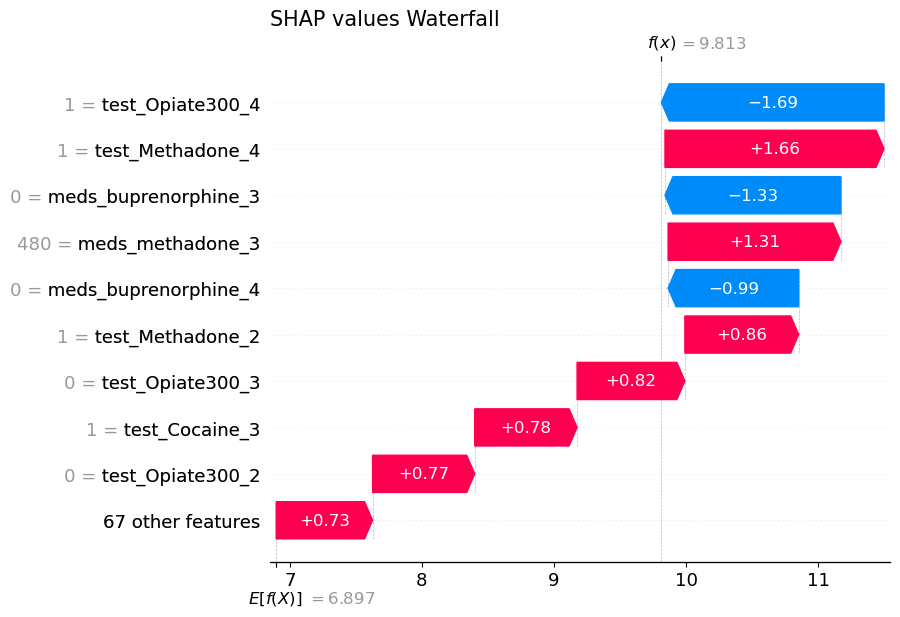

In [11]:
plt.title('SHAP values Waterfall', fontsize=15, loc='left')
shap.plots.waterfall(shap_values[2])

## The Waterfall Plot
- Positive SHAP values point to the right
- The y-axis exhibits the individual featurs, along with the values for the selected data instance
- The feature values are ordered by their magnitudes fof their SHAP values
- The X-axis is on the scale of the SHAP values
- The X-axis also shows the estimated expected prediction 𝔼(𝑓 (𝑋)) and the actual is 𝑓 (𝑥(𝑖))
- The bars start at the bottom from the expected prediction and add up to the actual prediction

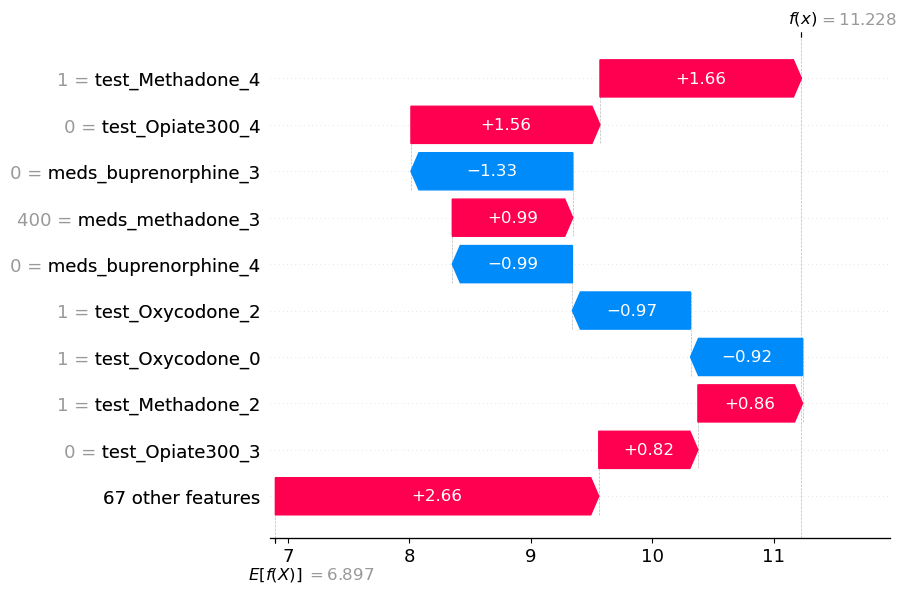

In [12]:
shap.waterfall_plot(shap_values[0])

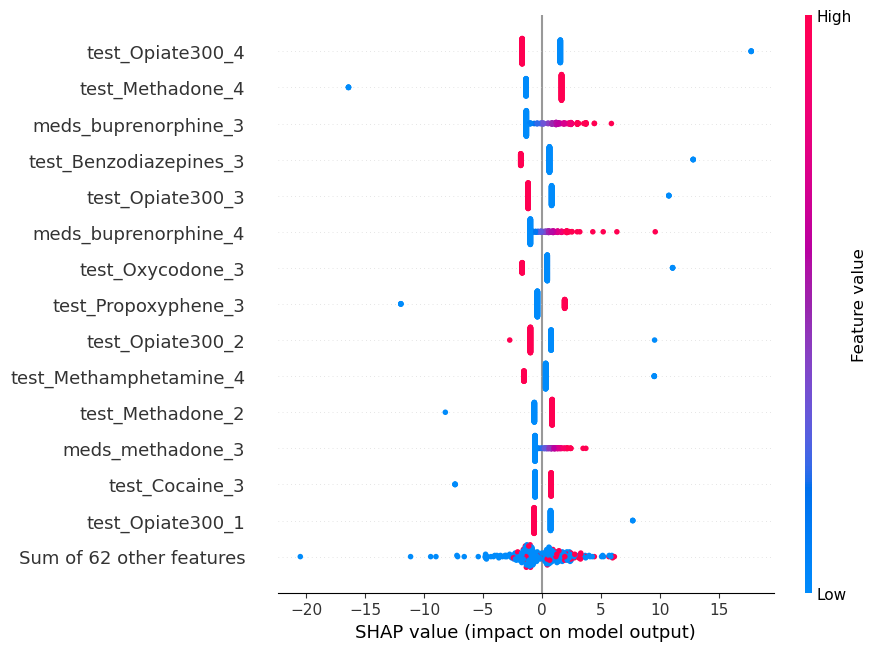

In [15]:
shap.plots.beeswarm(shap_values, max_display=15)

## Summary plot
- Also known as beeswarm plot.
- The x-axis represents the SHAP values, while the y-axis shows the
features, and the color indicates the feature’s value.
- Each row corresponds to a feature.
- The feature order is determined by importance, defined as the average of absolute SHAP values: 𝐼𝑗 = 1𝑛 ∑𝑛 𝑖=1 𝜙(𝑖)𝑗
• Each dot represents the SHAP value of a feature for a data point, resulting in a total of 𝑝 ⋅ 𝑛 dots.


## How to interpret the summary plot
- Observe the ranking of the features. The higher the feature, the greater its SHAP importance.
- For each feature of interest:
- Examine the distribution of the SHAP values. This provides insight into the various ways the feature values can influence the prediction. For instance, a wide spread indicates a broad rangeof influence.
- Understand the color trend for a feature: This offers an initial
insight into the direction of a feature effect and whether the relationship is monotonic or exhibits a more complex pattern.
- Look for color clusters that may indicate interesting data clusters.
Not relevant for linear models, but for non-linear ones.


## Comparison between coefficients and SHAP values

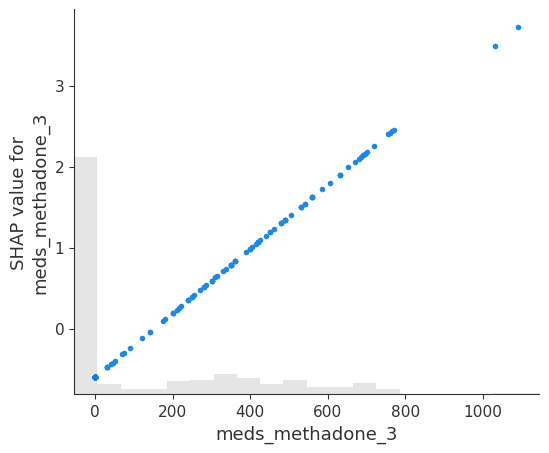

In [16]:
shap.plots.scatter(shap_values[:,'meds_methadone_3'])

## The dependence plot
- Also referred to as scatter plot.
- Mathematically, the plot contains these points: {(𝑥(𝑖)𝑗 , 𝜙(𝑖)𝑗 )}𝑛𝑖=1.
- The x-axis represents the feature value, and the y-axis represents the SHAP value.
- Highlighting feature interactions on the dependence plot can enhance its effectiveness.
- The dependence plot is similar to the summary plot for a single feature, but instead of using color to represent the feature value, these values are distributed across the x-axis.
- The grey histogram indicates the distribution of the feature values. Ranges with little data should be interpreted more cautiously.



In [17]:
feature = 'meds_methadone_3'
ind = X_train.columns.get_loc(feature)
coefs.coefficient[ind]

0.004